In [6]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
    
# Downloading the csv file from your GitHub account, training data
url = "https://raw.githubusercontent.com/allison2368/STA141C_FinalProject/main/Training.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df_train = pd.read_csv(io.StringIO(download.decode('utf-8')))


url_test = "https://raw.githubusercontent.com/allison2368/STA141C_FinalProject/main/Testing.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url_test).content

# Reading the downloaded content and turning it into a pandas dataframe

df_test = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe of test and training data


print(df_train.head())
print(df_test.head())
df = pd.concat([df_train, df_test])

# how many symptoms? 
# remove the empty column 
nan_value = float("NaN") 
df.replace("", nan_value, inplace=True) 
  
df.dropna(how='all', axis=1, inplace=True)

# count the number of symptoms 
symptoms = df.drop(columns=['prognosis'])

# Count the number of symptoms
num_symptoms = len(symptoms.columns)

print("Number of symptoms:", num_symptoms)


# how many observations in both training and testing?
print("Size of training data:", len(df_train))
print("Size of testing data:", len(df_test))
#print (df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

We will now conduct exploratory data analysis to see what the data looks like 

In [7]:
# Extract symptoms columns
symptoms = df.drop(columns=['prognosis'])

# list all of the symptons
for i in symptoms.columns:
	print(i)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [8]:
# since the data is binary coded, we will look at a summary that is more appropriate for binary data
# Extract symptoms columns
symptoms = df.drop(columns=['prognosis'])

# Calculate count of 1s and 0s for each symptom
symptom_counts = symptoms.sum()  # Sum across rows to count occurrences of 1s (presence)

# Calculate proportion of 1s for each symptom
symptom_proportions = symptom_counts / len(symptoms)

# Create a DataFrame to display the summary
summary_df = pd.DataFrame({
    'Count_of_1s': symptom_counts,
    'Count_of_0s': len(symptoms) - symptom_counts,
    'Proportion_of_1s': symptom_proportions
})
summary_df = summary_df.sort_values('Count_of_1s', ascending=False)
# Print the summary
#print(summary_df)
print("Top ten most common symptoms", summary_df[['Count_of_1s']].iloc[:10])


# Find the top 10 counts of diseases
top_10_counts = df['prognosis'].value_counts().head(10)

print("Top 10 counts of diseases:")
print(top_10_counts)

Top ten most common symptoms                    Count_of_1s
fatigue                   1949
vomiting                  1931
high_fever                1374
loss_of_appetite          1162
nausea                    1156
headache                  1144
abdominal_pain            1041
yellowish_skin             920
yellowing_of_eyes          823
chills                     805
Top 10 counts of diseases:
Fungal infection                122
Hepatitis C                     121
Hepatitis E                     121
Alcoholic hepatitis             121
Tuberculosis                    121
Common Cold                     121
Pneumonia                       121
Dimorphic hemmorhoids(piles)    121
Heart attack                    121
Varicose veins                  121
Name: prognosis, dtype: int64


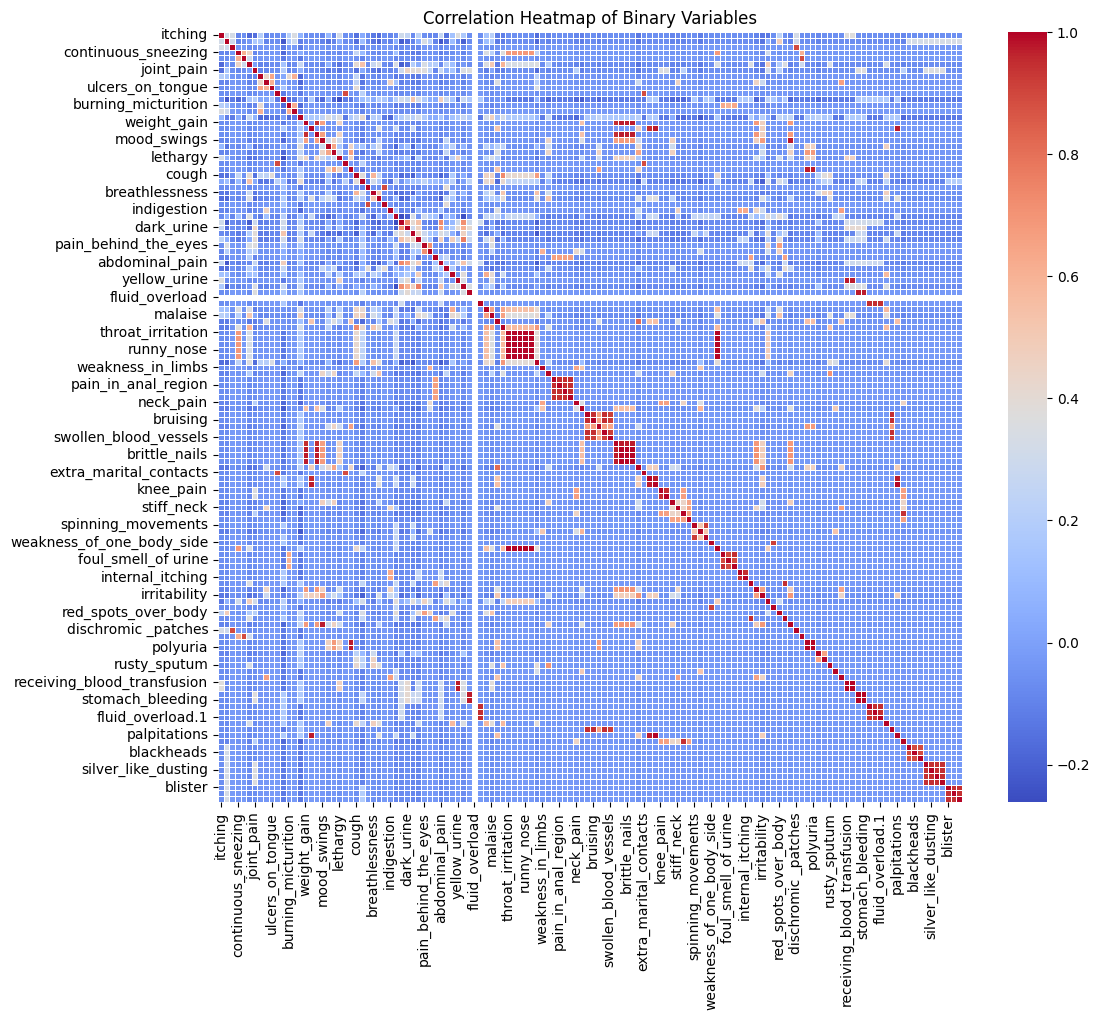

itching                       itching                         1.0
redness_of_eyes               throat_irritation               1.0
sinus_pressure                sinus_pressure                  1.0
                              redness_of_eyes                 1.0
                              throat_irritation               1.0
redness_of_eyes               loss_of_smell                   1.0
                              congestion                      1.0
                              runny_nose                      1.0
                              sinus_pressure                  1.0
                              redness_of_eyes                 1.0
throat_irritation             loss_of_smell                   1.0
sinus_pressure                congestion                      1.0
throat_irritation             congestion                      1.0
                              runny_nose                      1.0
                              sinus_pressure                  1.0
          

In [18]:
# view the data in a correlation map
# Calculate the correlation matrix
corr_matrix = symptoms.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Binary Variables')
plt.show()

s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so.iloc[:20])

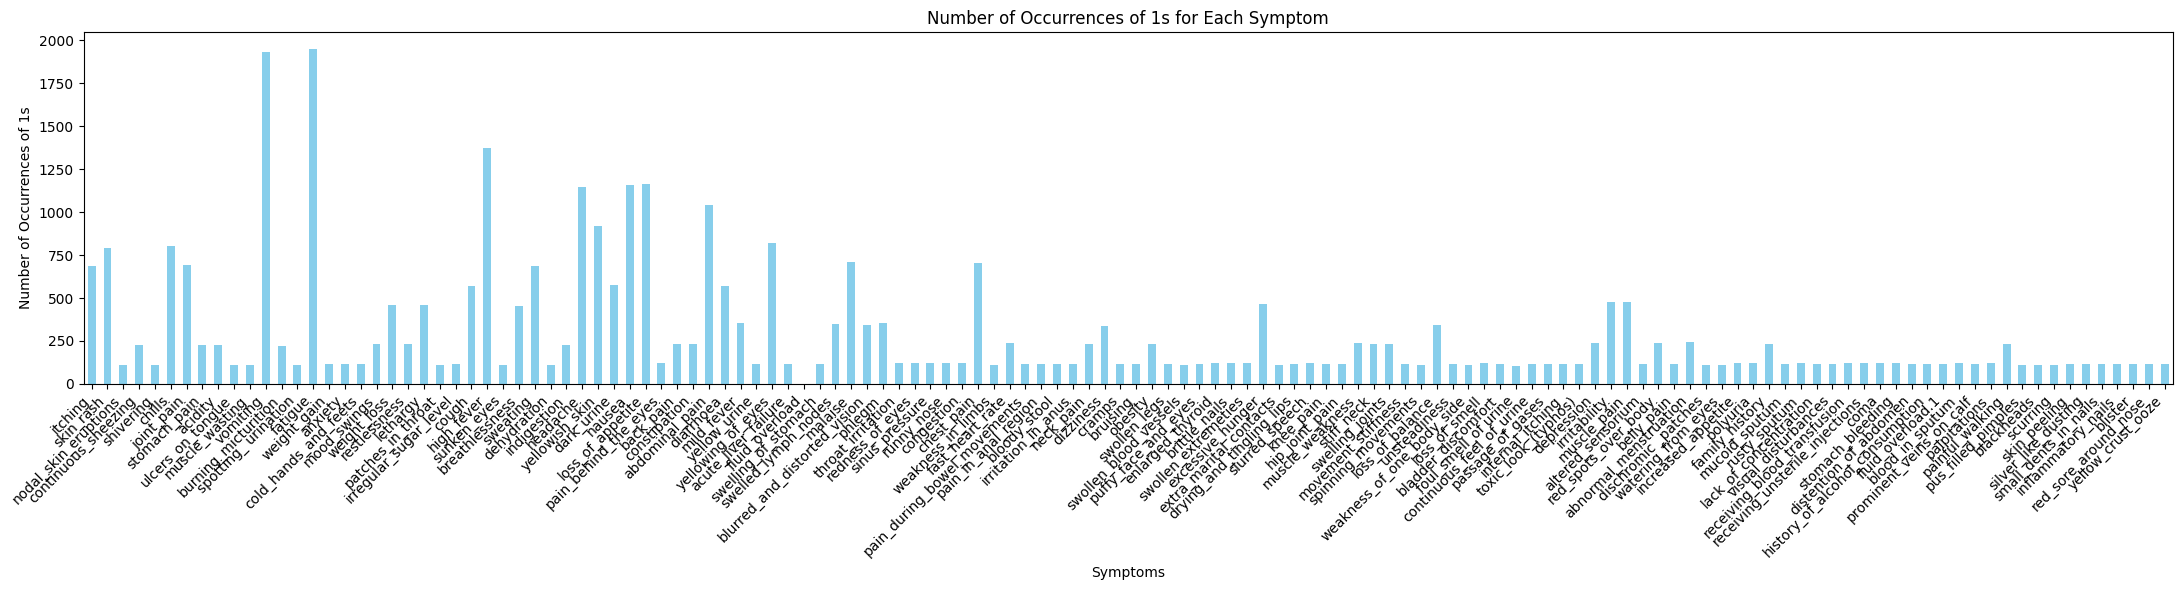

In [12]:
# Calculate the count of 1s (occurrences) for each symptom
symptom_counts = symptoms.sum()

# Plotting the counts
plt.figure(figsize=(22, 6))
symptom_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences of 1s for Each Symptom')
plt.xlabel('Symptoms')
plt.ylabel('Number of Occurrences of 1s')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We need to preprocess the data first, and since the last category

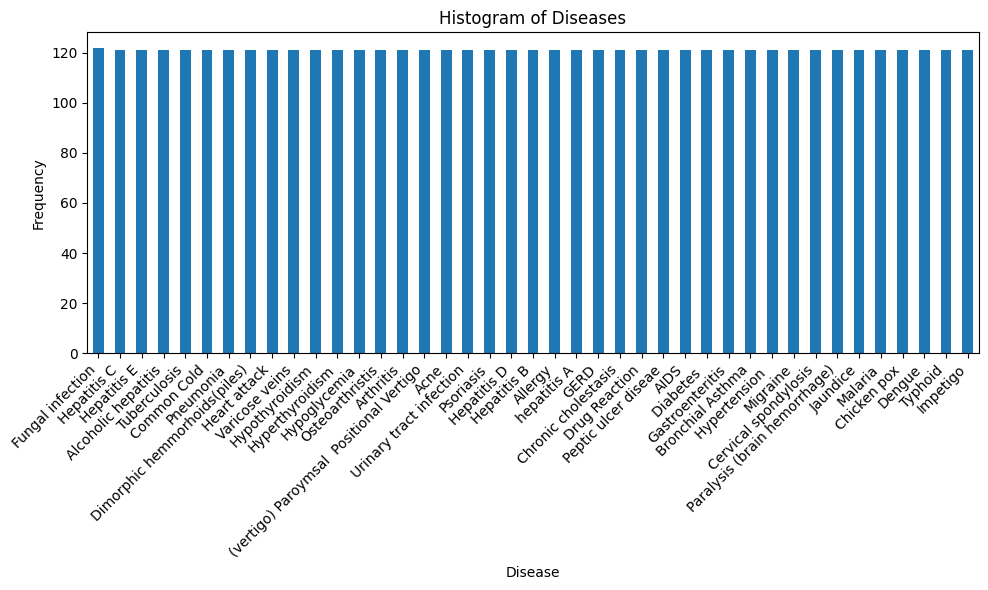

In [10]:
# Plot histogram
plt.figure(figsize=(10,6))
df['prognosis'].value_counts().plot(kind='bar')
plt.title('Histogram of Diseases')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()